<a href="https://colab.research.google.com/github/sydney-ho/Airbnb-Analysis/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# EDA

In [67]:
df = pd.read_csv('AB_NYC_2019.csv')

In [68]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [70]:
# Remove unnecessary column
df.drop(columns=['last_review'], axis=1, inplace=True)

In [71]:
# Drop rows with no prices:

df['price'].dropna(inplace=True)

In [72]:
# Define null items by columns

# This finds the percentage of null values by column
df.isnull().sum()/len(df)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [73]:
# Clean data by accounting for null values, repalcing them with necessary values

df['name'].fillna('None', inplace=True)
df['host_name'].fillna('None', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [74]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
cwd = os.getcwd()
path = cwd + '/final_clean_airbnb.csv'
df.to_csv(path, index=False)

In [75]:
import re

# Clean the Price Column
def clean_price(price):
    if price:
        numeric_price = re.sub("[^0-9.]", "", str(price))
        if numeric_price:
            return float(numeric_price)
    return None

df["price"] = df["price"].apply(clean_price)



In [98]:
# Filter out price values above 1200, denoted as outliers:

df = df[df["price"] <= 1200]

In [77]:
from math import radians, sin, cos, sqrt, atan2

# Add a new variable to track the distance from Times Square

# Define the coordinates of Times Square
ts_lat, ts_lon = 40.7589, -73.9851

# Define a function to calculate the distance between two coordinates using the Haversine formula
def distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the earth in km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    a = sin(dLat/2) * sin(dLat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dLon/2) * sin(dLon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c
    return d

# Apply the distance function to calculate the distance between each property and Times Square
df['dist_from_manhattan'] = df.apply(lambda row: distance(row['latitude'], row['longitude'], ts_lat, ts_lon), axis=1)


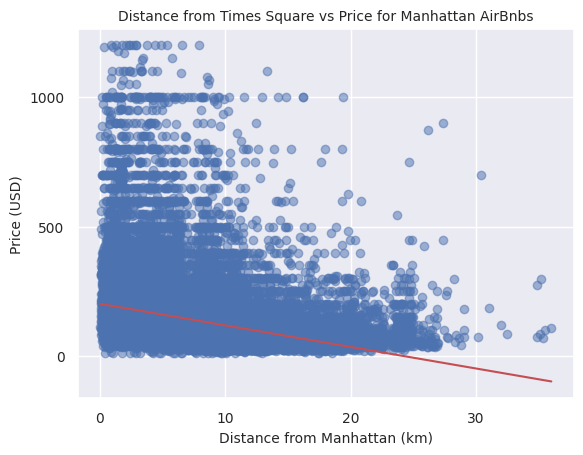

In [106]:
from scipy.stats import linregress

# Create a scatter plot of distance from Manhattan vs price
plt.scatter(df['dist_from_manhattan'], df['price'], alpha=0.5)
plt.title('Distance from Times Square vs Price for Manhattan AirBnbs', fontsize=10)
plt.xlabel('Distance from Manhattan (km)', fontsize=10)
plt.ylabel('Price (USD)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
xticks_vals = np.linspace(0, 40, 5) # 0 to 40 in 4 equal increments
xticks_labels = [f'{x:.0f}' for x in xticks_vals]
plt.xticks(xticks_vals, xticks_labels)

# Calculate the slope and intercept of the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df['dist_from_manhattan'], df['price'])
x = np.array([df3['dist_from_manhattan'].min(), df['dist_from_manhattan'].max()])
y = slope * x + intercept

# Plot the regression line over the scatter plot
plt.plot(x, y, color='r')

plt.show()

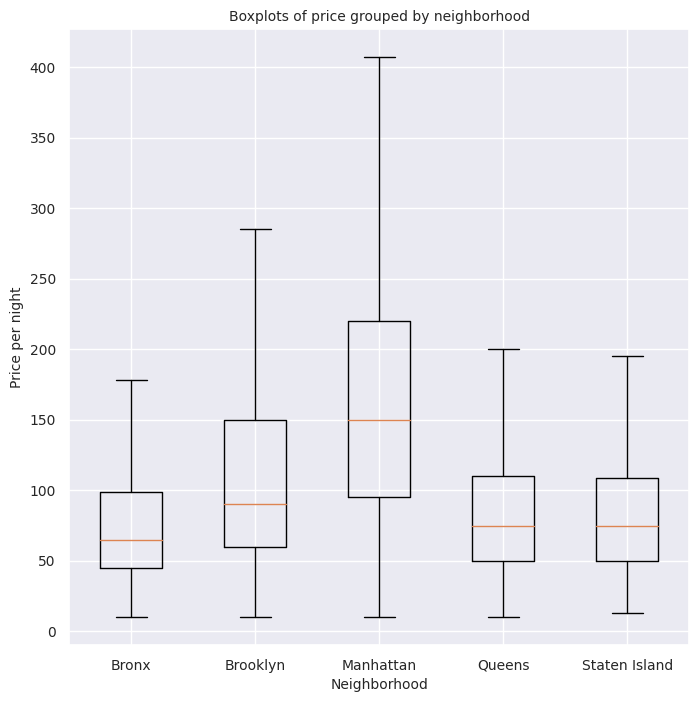

In [87]:
neighbourhood_group_price = df.groupby('neighbourhood_group').price

fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot([neighbourhood_group_price.get_group('Bronx'),
            neighbourhood_group_price.get_group('Brooklyn'),
            neighbourhood_group_price.get_group('Manhattan'),
            neighbourhood_group_price.get_group('Queens'),
            neighbourhood_group_price.get_group('Staten Island')],
            labels=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],showfliers=False)

ax.set_xlabel("Neighborhood", fontsize=10)
ax.set_ylabel("Price per night", fontsize=10)
ax.set_title("Boxplots of price grouped by neighborhood", fontsize=10)
ax.tick_params(axis='both', labelsize=10)

plt.show()

In [101]:
neighbourhood_group_price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,85.361800,77.761144,10.0,45.0,65.0,99.0,1000.0
Brooklyn,20050.0,118.303890,96.670552,10.0,60.0,90.0,150.0,1200.0
Manhattan,21526.0,180.638066,139.723956,10.0,95.0,150.0,220.0,1200.0
Queens,5656.0,95.008310,74.527596,10.0,50.0,75.0,110.0,1000.0
Staten Island,371.0,98.584906,96.138752,13.0,50.0,75.0,109.0,1000.0


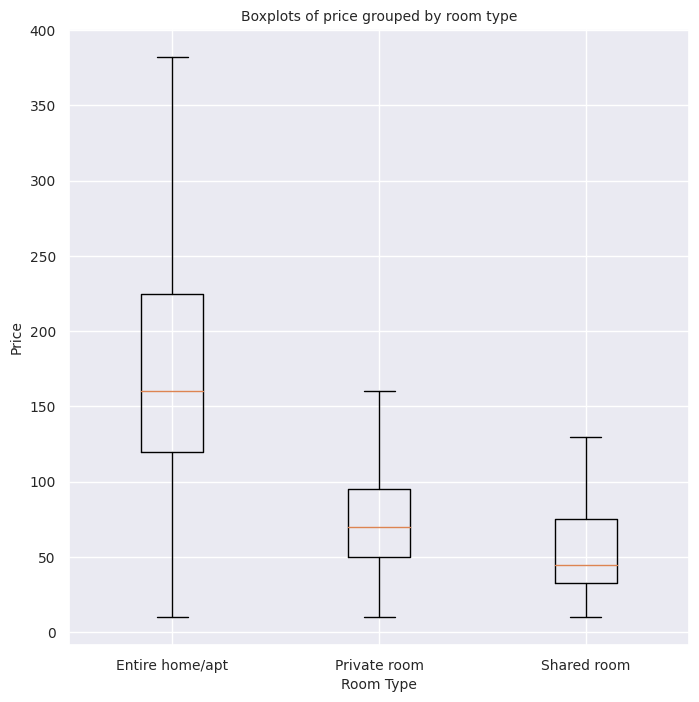

In [104]:
# Create boxplots grouped by room type

room_type_grouped_price = df.groupby('room_type').price.mean()

fig, ax = plt.subplots(figsize=(8, 8))
boxplot_data = [df[df['room_type'] == room_type]['price'] for room_type in room_type_grouped_price.index]
ax.boxplot(boxplot_data, labels=room_type_grouped_price.index, showfliers=False)

ax.set_xlabel("Room Type", fontsize=10)
ax.set_ylabel("Price", fontsize=10)
ax.set_title("Boxplots of price grouped by room type", fontsize=10)
ax.tick_params(axis='both', labelsize=10)

plt.show()

In [105]:
df.groupby('room_type').price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25259.0,196.212914,131.844884,10.0,120.0,160.0,225.0,1200.0
Private room,22277.0,84.969655,70.064162,10.0,50.0,70.0,95.0,1200.0
Shared room,1156.0,67.731834,81.076816,10.0,33.0,45.0,75.0,1000.0


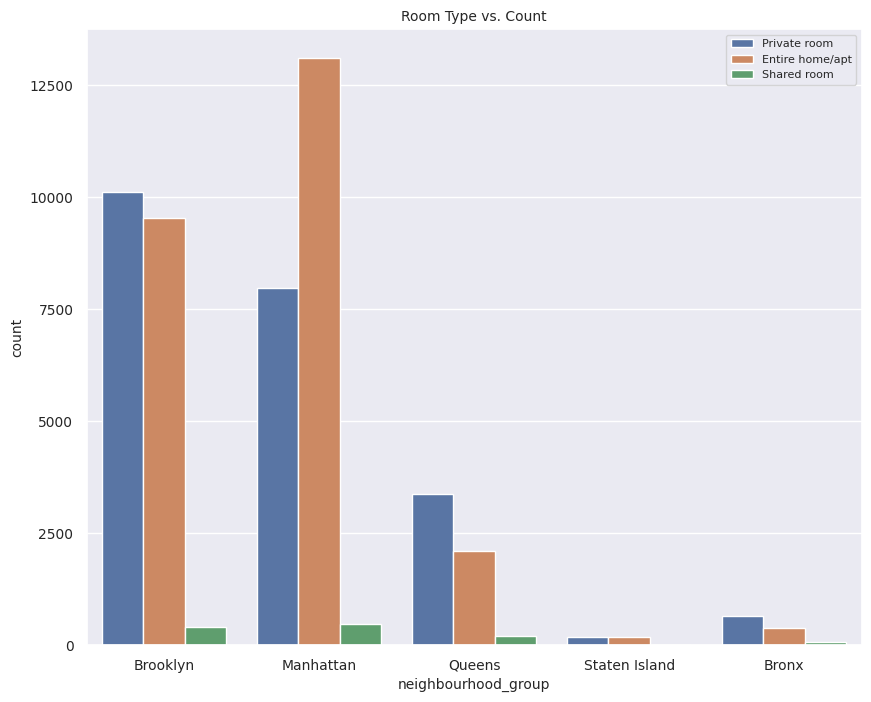

In [91]:
# Visualize how the neighborhood groups and room types relate

plt.figure(figsize=(10,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Room Type', fontsize=10)
plt.title('Room Type vs. Count', fontsize=10)
ax = sns.countplot(x=df['neighbourhood_group'],hue=df['room_type'])# here hue parameter will give us 3 diffrent colors
ax.legend(fontsize=8)

plt.show()

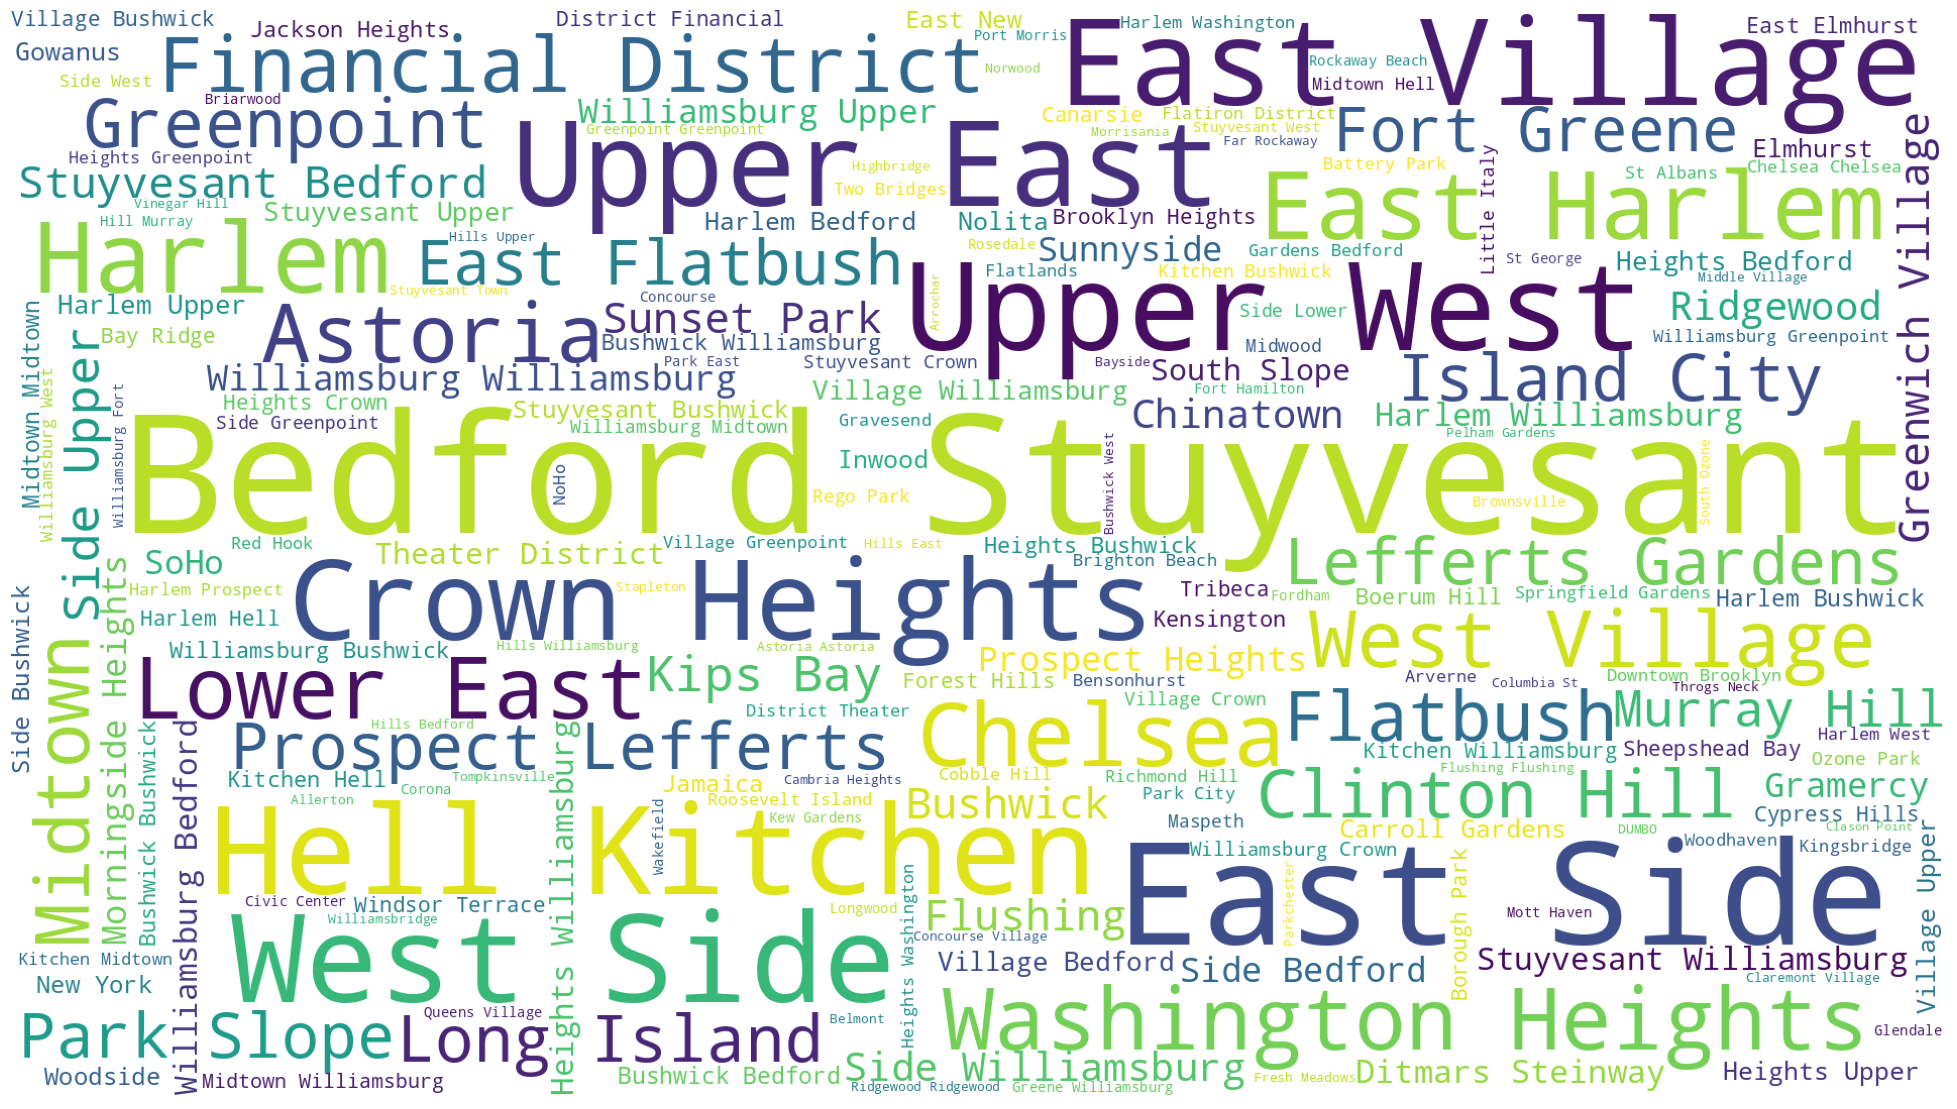

In [ ]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

<BarContainer object of 10 artists>

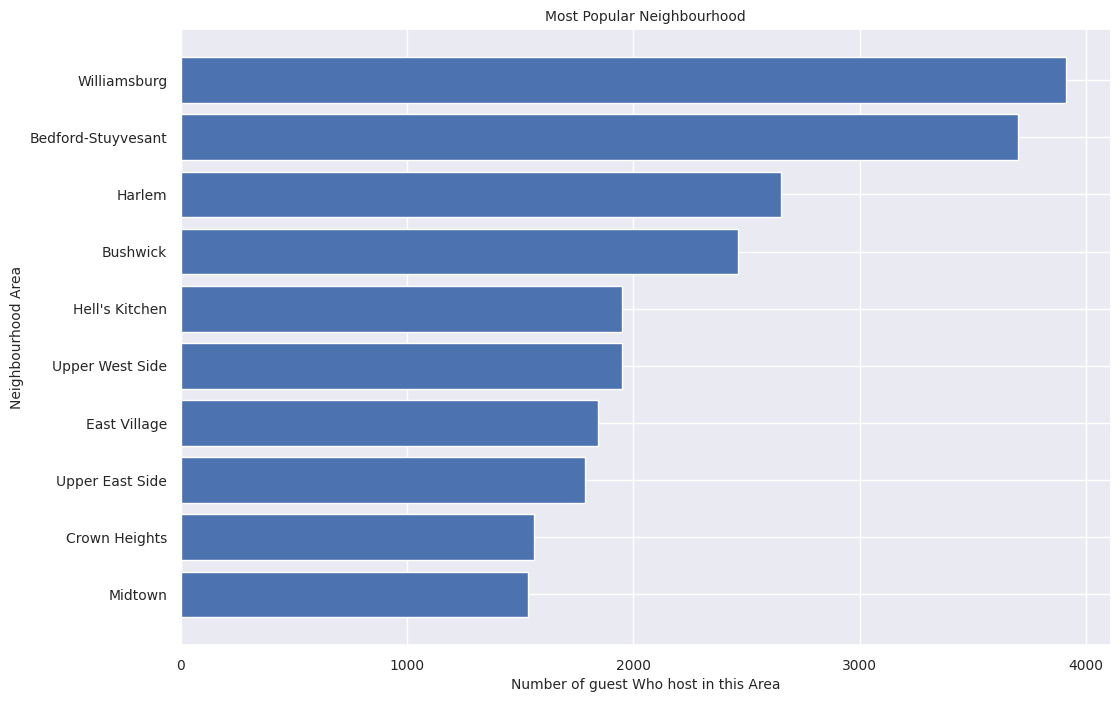

In [92]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood", fontsize=10)
plt.ylabel("Neighbourhood Area", fontsize=10)
plt.xlabel("Number of guest Who host in this Area", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.barh(x, y)

<ipython-input-57-051b6feb5fd7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

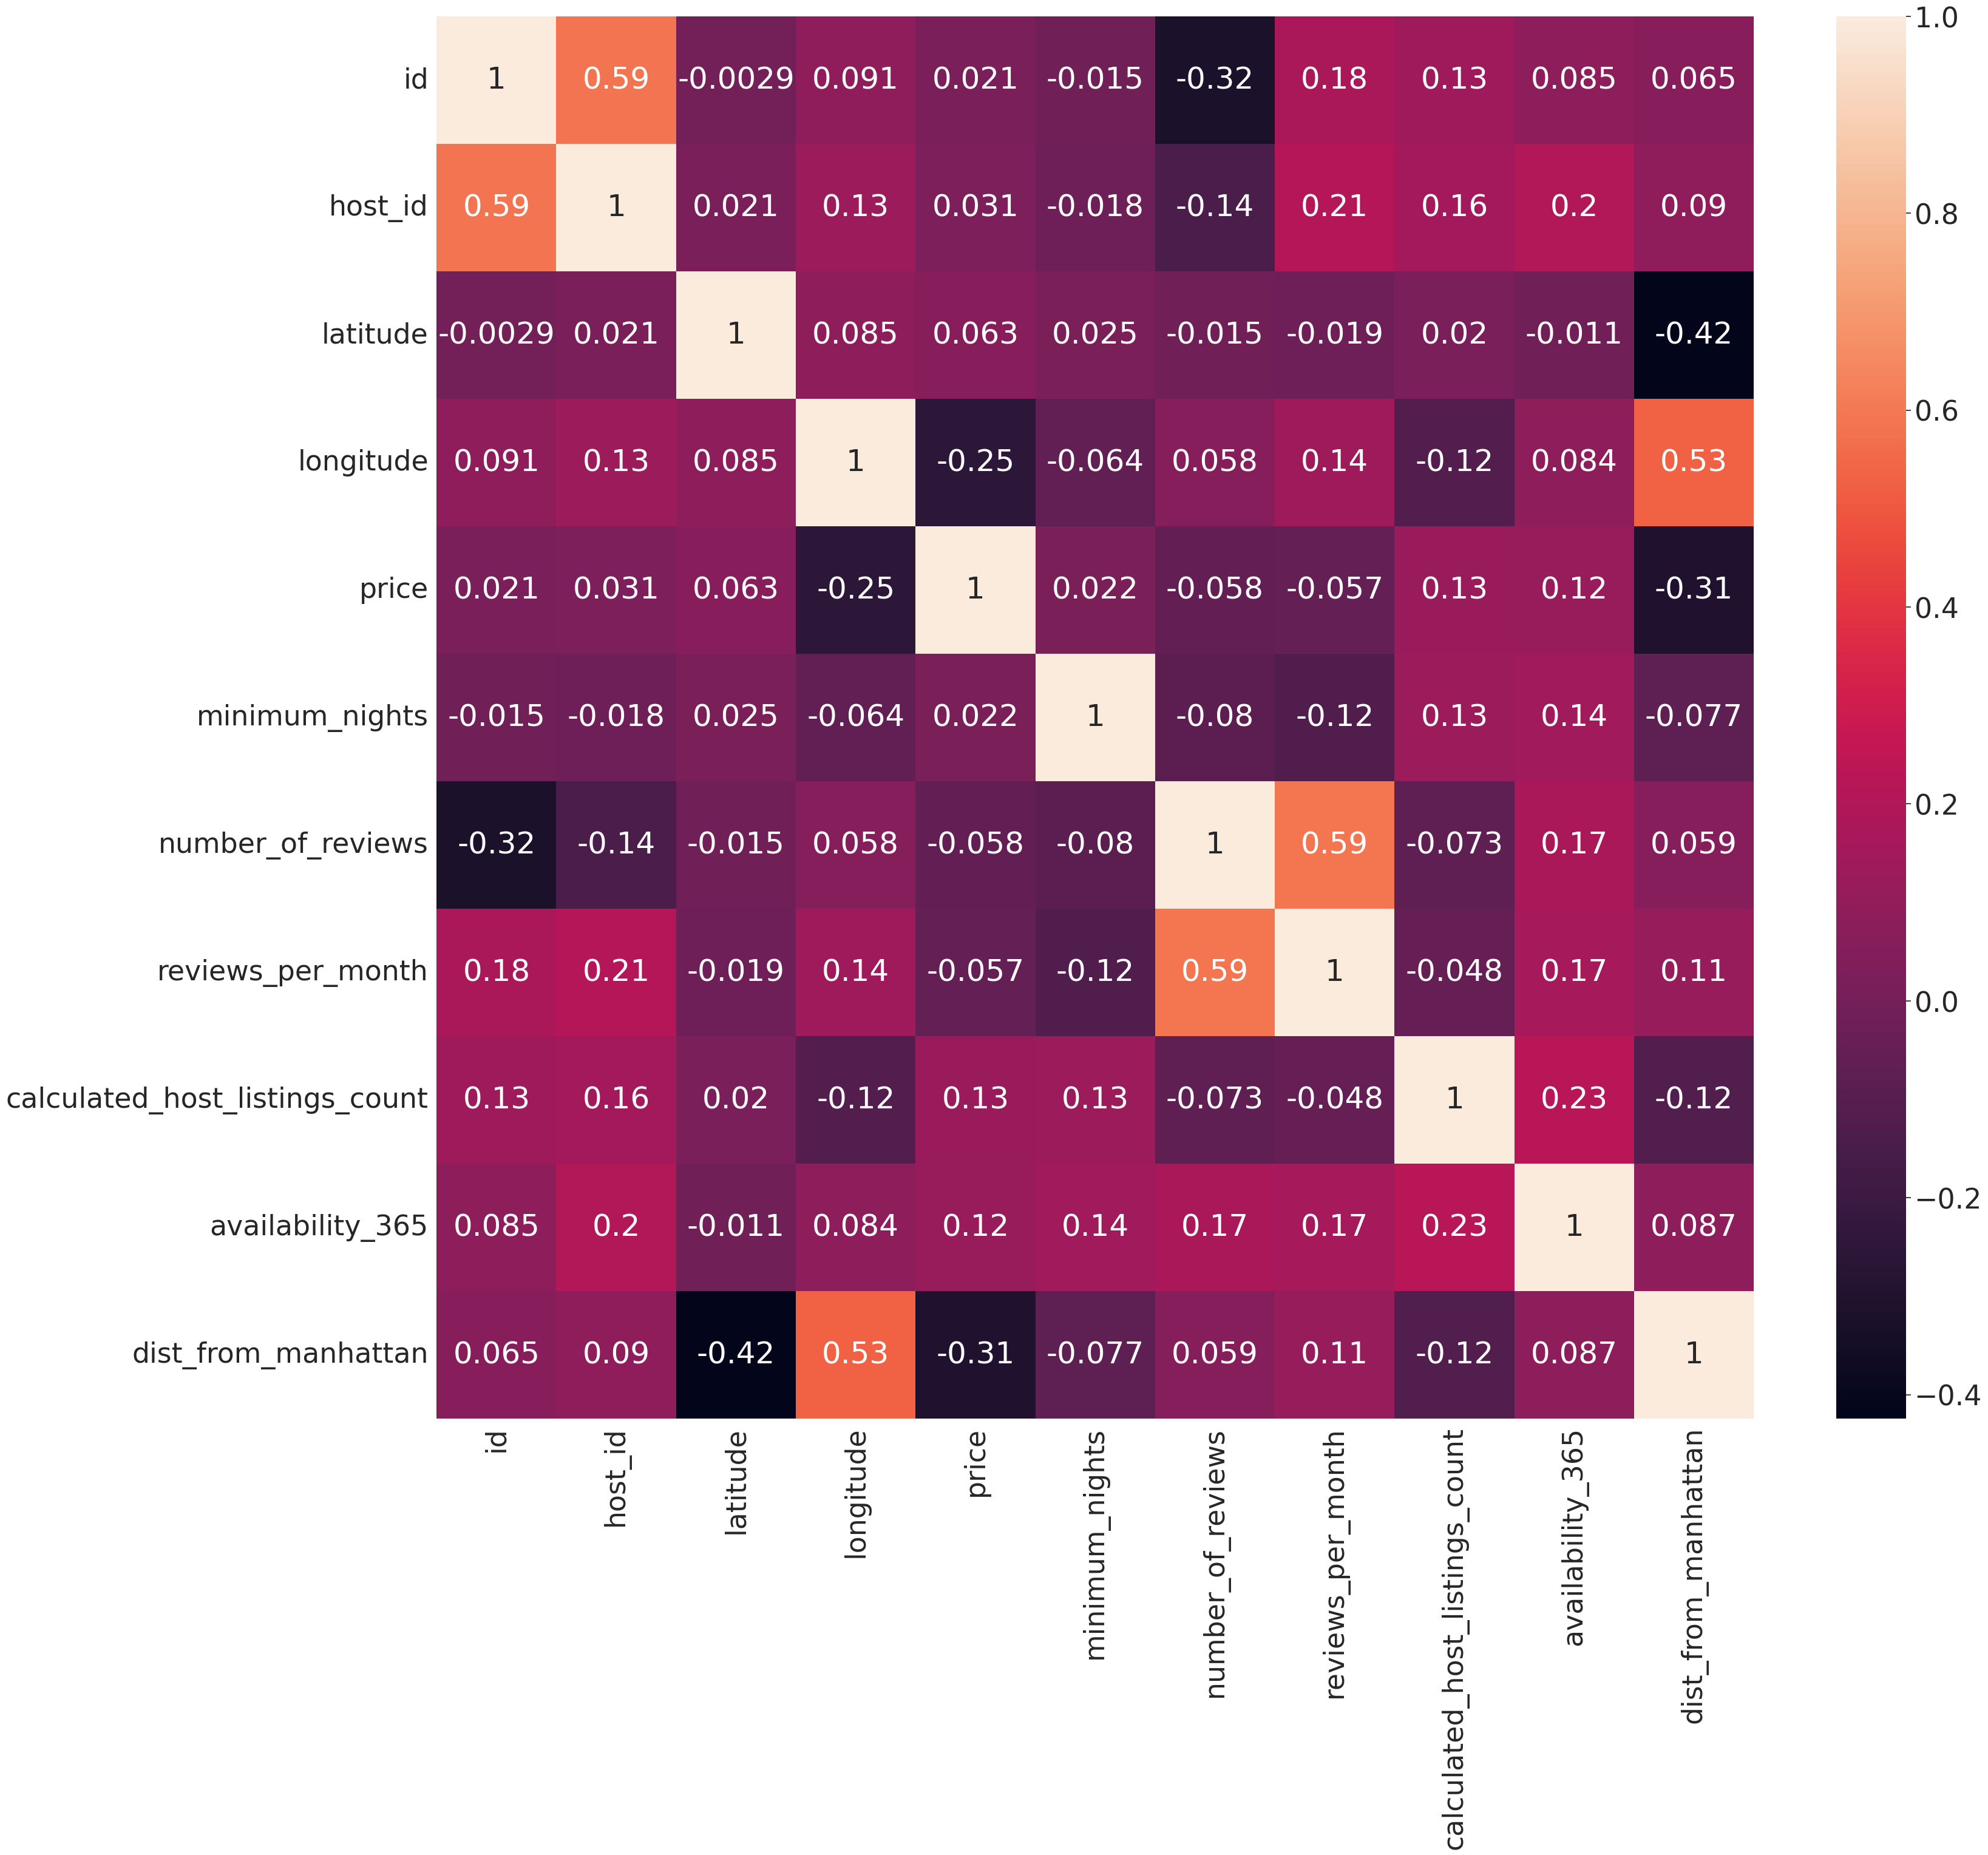

In [ ]:
# Plot a correlation matrix to see how the variables interact
sns.set(font_scale=3)
plt.figure(figsize=(35, 30))
sns.heatmap(df.corr(), annot=True)